# <center>Projet Finance</center>

## <center>Load "P3_Loan prediction"</center>

# Problématique métier :
L'étude explore l'utilisation de modèles d'apprentissage machine pour prédire les défauts de paiement des prêts en se basant sur les comportements des clients bancaires, visant ainsi à éviter les risques de défaut de paiement.

### Analyse des données :

- **Variable cible :** Loan_Status (Statut_de_prêt)
  
- **Variables features :** 
  - Train : Loan_ID (Prêt_ID), Gender (Genre), Married (Marié), Dependents (Personnes à charge), Education (Diplômée ou non diplômée), Self_Employed (Travailleurs indépendants), ApplicantIncome (Revenu du demandeur), CoapplicantIncome (Revenu Co-demandeur), LoanAmount (Montant du prêt), Loan_Amount_Term (Montant et durée du prêt), Credit_History (Crédit_Histoire), Property_Area (Zone_de_propriété)

- **Nombre de lignes et de colonnes :** 614 lignes, 13 colonnes

- **Types de variables :** 
  - Qualitatives : 7
  - Quantitatives : 6

- **Analyse des valeurs manquantes :**
  - Quelques valeurs NaN (Credit_History < 0.08%, Self_Employed < 0.05%, LoanAmount < 0.03% de NaN)
  - Suppression possible des NaN dans Self_Employed < 0.05%, LoanAmount < 0.03% et dans Credit_History < 0.08%
  - Peu de données manquantes, suppression envisageable sans problème apparent

### Analyse de fond :

• **Visualisation de la target :** 68% de positifs (422 / 614)

- **Signification des variables :**
  - Gender : Plus d'hommes que de femmes empruntent, variable discriminatoire à considérer pour suppression.
  - Married : Plus de personnes mariées empruntent.
  - Dependents : Ce sont les personnes sans enfant à charge qui empruntent le plus.
  - Education : Plus de diplômés empruntent que de non diplômés.
  - Self_Employed : Moins de travailleurs indépendants que de salariés.
  - Property_Area : Homogène, mais les personnes Semiurban empruntent sur une durée de 3 ans en moyenne.

    - Target : Plus de personnes ont un prêt que pas de prêt. Classes déséquilibrées, envisager le score F1.

- **Variable qualitative :** binaire (0, 1),  Credit_History

• **Relation Variables / Target :** 

- Target / Gender : Plus d'hommes empruntent, considération pour suppression.
- Target / Dependents : Ce sont les personnes mariées sans enfant à charge qui empruntent le plus.
- Target / Education : Ce sont les diplômés qui empruntent.
- Target / ApplicantIncome : Les revenus <= 1000e empruntent le plus, nombreux outliers.
- Target / LoanAmount / Loan_Amount_Term  : Des montants de prêt variés, avec des durées de remboursement parfois incohérentes, nombreux outliers.
- Target / Property_Area : Les personnes Semiurban empruntent plus, sur une durée de 3 ans en moyenne, pour des montants supérieurs à 175e.

### Analyse plus détaillée :
• **Relation Variables / Variables :**
	
- **ApplicantIncome/ LoanAmount :** Forte corrélation, nécessite un suivi.
  - Moyenne des revenus : 5364.23
  - Médiane des revenus : 3859.0
  - Variance des revenus : 32062136.67 
  - Écart-type des revenus : 5662.34
  - Quartile Q1 : 2899.0, Quartile Q3 : 5852.0
  - Moyenne des revenus (non drop) : 5403.46
  - Médiane des revenus (non drop) : 3812.5
  - Variance des revenus (non drop) : 37259607.77
  - Écart-type des revenus (non drop) : 6104.06
  - Quartile Q1 (non drop) : 2878.0, Quartile Q3 (non drop) : 5795.0


## Import Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

## Analyse de la forme de nos données

In [2]:
dataTrain = pd.read_csv("csv/train.csv")
dataTrain.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
df = dataTrain.copy()

In [391]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [392]:
# On compte nos valeurs contenues dans notre Dataset ( Lignes, Colonnes) :
df.shape

(614, 13)

In [393]:
# On visualise le type de nos valeurs :
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


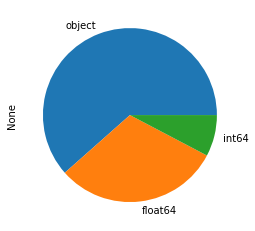

In [396]:
# On visualise le type de nos valeurs sous forme de graphique :
df.dtypes.value_counts().plot.pie()

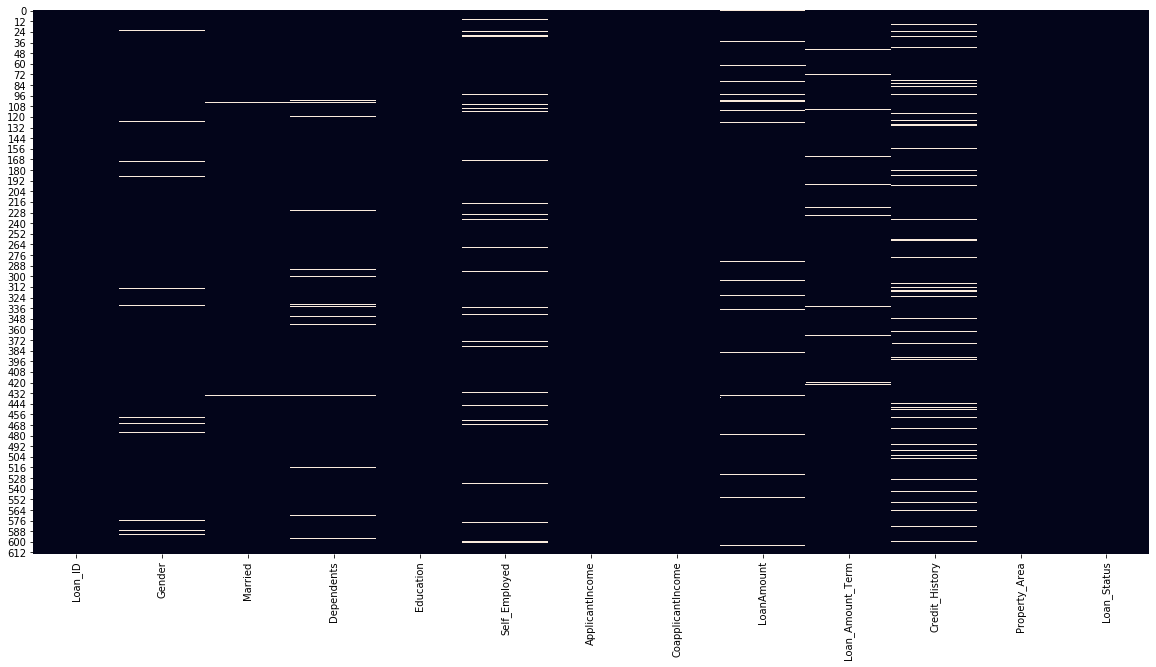

In [397]:
# On visualise le nombre de valeur null sous forme de graphique :
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [19]:
# On supprime la colonne Loan_ID, qui ici ne nous serviras pas à grand chose :
df = df.drop('Loan_ID', axis=1)

In [399]:
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [400]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# On regarde le pourcentage de valeurs manquantes, en divisant par le nombre de ligne de notre tableau :
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
Married              0.004886
Gender               0.021173
Loan_Amount_Term     0.022801
Dependents           0.024430
LoanAmount           0.035831
Self_Employed        0.052117
Credit_History       0.081433
dtype: float64

## Analyse de fond

### Visualisation de notre target

In [5]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [403]:
# On compte le nombre de cas positif et négatif :
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [404]:
# On compte le nombre de cas positif et négatif, en pourcentage :
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

On constate que nos classes ne sont pas équilibrées. On devra donc peut-être utilisés une metrics comme le score f1.

### Histogrammes des variables continues 

In [ ]:
# On créée une boucle for en sélectionnant toutes les colonnes qui sont des colonnes de type float :
for col in df.select_dtypes('float'):
    print(f'{col : -<3 0} {df[col].unique()}')

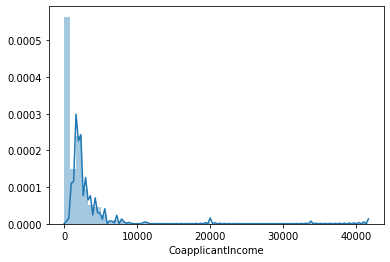

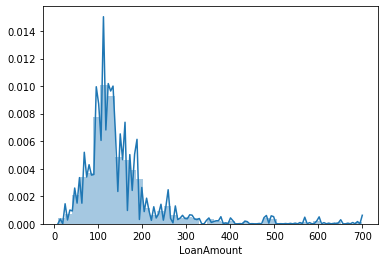

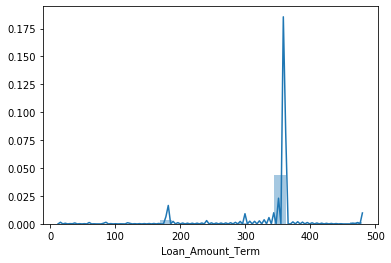

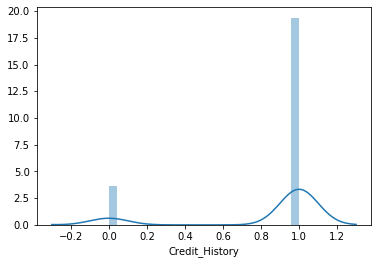

In [25]:
# On créée une boucle for en sélectionnant toutes les colonnes qui sont des colonnes de type float :
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col], kde_kws={'bw' : 0.1})

• Relation Variables / Target : 

On peut constater que les revenus des Co-demandeur ( CoapplicantIncome ) sont plus élevés. Le Montant du prêt ( Loan_Amount ) est cohérent. En revanche le Montant et la durée du prêt ( Loan_Amount_Term ) montre clairement un disfonctionnement, on voit un pic entre le montant et la durée du prêt, au-delà de 360 mois.

In [59]:
# On créée une boucle for en sélectionnant toutes les colonnes qui sont des colonnes de type object :
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

Gender-------------- ['Male' 'Female' nan]
Married------------- ['No' 'Yes' nan]
Dependents---------- ['0' '1' '2' '3+' nan]
Education----------- ['Graduate' 'Not Graduate']
Self_Employed------- ['No' 'Yes' nan]
Property_Area------- ['Urban' 'Rural' 'Semiurban']
Loan_Status--------- ['Y' 'N']


On constate que nous avons des valeurs manquantes nan, comme nous avions déjà pu le voir précédemment. Nous allons pouvoir les supprimer pour plus de cohérence.

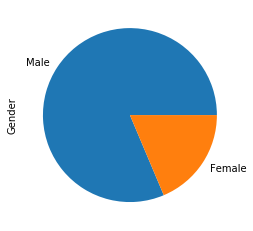

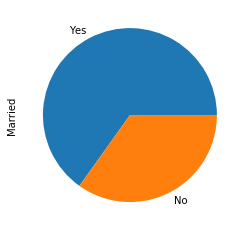

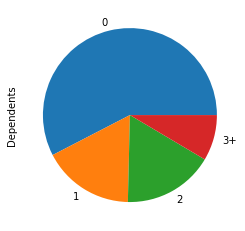

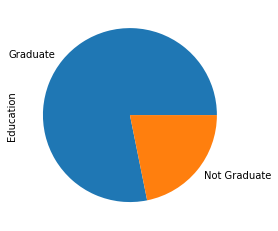

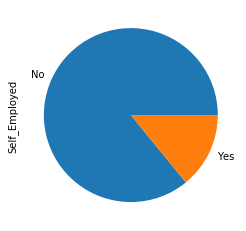

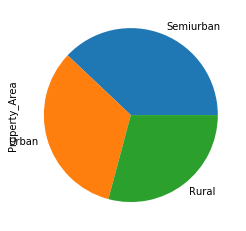

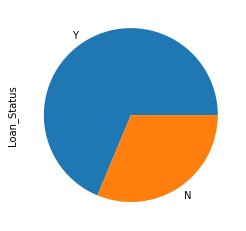

In [66]:
# On créée une boucle for en sélectionnant toutes les colonnes qui sont des colonnes de type object :
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

- Nous pouvons constater que nous avons plus d'homme que de femme, comme souvent. 

- Nous avons plus de persones mariés que pas mariés.

- Nous manquons d'information sur la feature Dependents, qui se classe de cette manière Dependents = 0, 1, 2, 3+, à creuser.

- Nous avons pour la feature Education, plus de diplômés que de non diplômés.

- On a beaucoup moins de Travailleurs indépendants que de salariés.

- La Property_Area ( Zone de propriété ) est plutôt homogéne.

- Et pour la Target : plus de personnes ayant un prêt que pas de prêt. On constate que nos classes ne sont pas équilibrées. On devra donc peut-être utilisés une metrics comme le score f1.

### Variables Qualitatives :

In [85]:
# On vérifie les differentes catégorie qui réside dans chaque variable ( surtout celles comportant des Nan, déjà vu précedemment ):
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Self_Employed'].unique())



['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']


## Relation Target / Variables :
Création de sous-ensembles positifs et négatifs


In [119]:
emprunt_df = df[df['Loan_Status'] == 'Y']
emprunt_df.shape

(422, 12)

In [121]:
pasemprunt_df = df[df['Loan_Status'] == 'N']
pasemprunt_df.shape

(192, 12)

### Visualiser la relation Target / Gender

In [50]:
# On regarde les croisements pour les cas positifs et negatifs de nos deux virus :
pd.crosstab(df['Loan_Status'], df['Gender'])

Gender       Female  Male
Loan_Status              
N                37   150
Y                75   339

In [13]:
# On visualise en comptant le nombre d'apparition de chaque 'Gender' , pour les résultats de prêt (oui ou non) 'Loan_Status' :
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = df)

### Visualiser la relation Target / Dependents

In [51]:
# On regarde les croisements pour les cas positifs et negatifs de nos deux virus :
pd.crosstab(df['Loan_Status'], df['Dependents'])

Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33

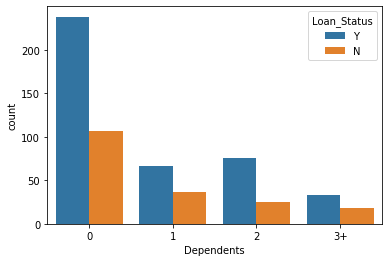

In [16]:
# On visualise en comptant le nombre d'apparition de chaque 'Dependents' , pour les résultats de prêt (oui ou non) 'Loan_Status' :
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = df)

### Visualiser la relation Target / Education

In [52]:
# On regarde les croisements pour les cas positifs et negatifs de nos deux virus :
pd.crosstab(df['Loan_Status'], df['Education'])

Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82

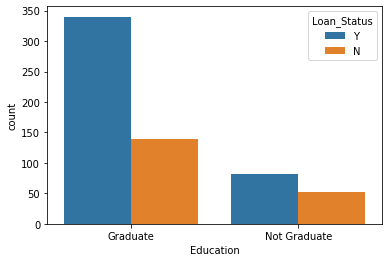

In [133]:
# On visualise en comptant le nombre d'apparition de chaque 'Education' , pour les résultats de prêt (oui ou non) 'Loan_Status' :
sns.countplot(x = 'Education', hue = 'Loan_Status', data = df)

### Visualiser la relation Target / ApplicantIncome

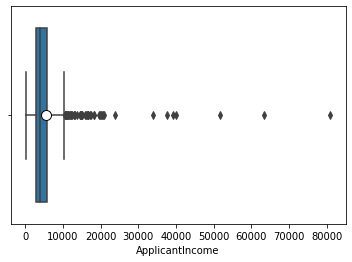

In [330]:
# On visualise en comptant le nombre d'apparition de chaque 'ApplicantIncome' , pour les résultats de prêt (oui ou non) 'Loan_Status' :
sns.boxplot(x = 'ApplicantIncome', hue = 'Loan_Status', data = df, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

### Visualiser la relation Target / LoanAmount

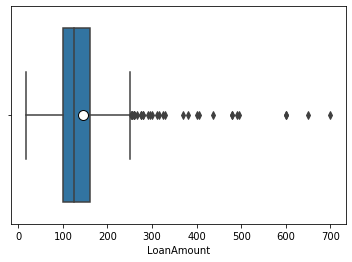

In [317]:
# On visualise en comptant le nombre d'apparition de chaque 'LoanAmount' , pour les résultats de prêt (oui ou non) 'Loan_Status' :
sns.boxplot(x=df_emprunt["LoanAmount"], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

### Visualiser la relation Target / Loan_Amount_Term

In [57]:
# On regarde les croisements pour les cas positifs et negatifs de nos deux virus :
pd.crosstab(df['Loan_Status'], df['Loan_Amount_Term'])

Loan_Amount_Term  12.0   36.0   60.0   84.0   120.0  180.0  240.0  300.0  \
Loan_Status                                                                
N                     0      2      0      1      0     15      1      5   
Y                     1      0      2      3      3     29      3      8   

Loan_Amount_Term  360.0  480.0  
Loan_Status                     
N                   153      9  
Y                   359      6

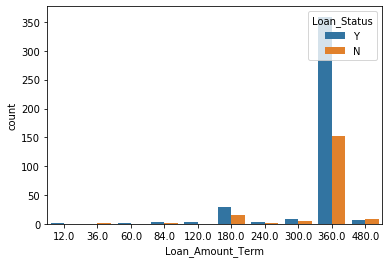

In [62]:
# On visualise en comptant le nombre d'apparition de chaque 'Loan_Amount_Term' , pour les résultats de prêt (oui ou non) 'Loan_Status' :
sns.countplot(x = 'Loan_Amount_Term', hue = 'Loan_Status', data = df)

### Visualiser la relation Target / Property_Area

In [61]:
# On regarde les croisements pour les cas positifs et negatifs de nos deux virus :
pd.crosstab(df['Loan_Status'], df['Property_Area'])

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133

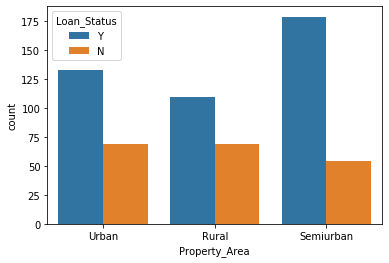

In [38]:
# On visualise en comptant le nombre d'apparition de chaque 'Property_Area' , pour les résultats de prêt (oui ou non) 'Loan_Status' :
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = df)

### Visualiser la relation Property_Area / Loan_Amount_Term

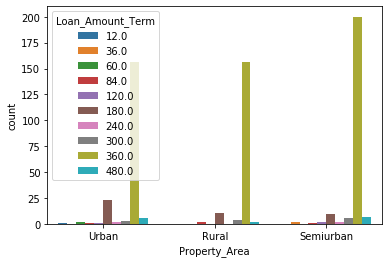

In [156]:
# On visualise en comptant le nombre d'apparition de chaque 'Property_Area' , pour les résultats de prêt (oui ou non) 'Loan_Amount_Term' :
sns.countplot(x = 'Property_Area', hue = 'Loan_Amount_Term', data = df)

### Visualiser la relation Married / Dependents

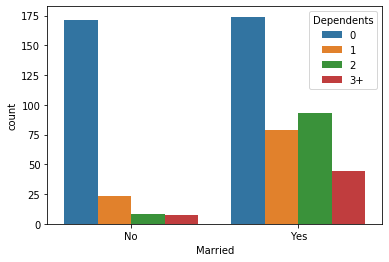

In [157]:
# On visualise en comptant le nombre d'apparition de chaque 'Married' , pour les résultats de prêt (oui ou non) 'Dependents' :
sns.countplot(x = 'Married', hue = 'Dependents', data = df)

## Analyse un peu plus détaillée

Relations Variables / Variables :

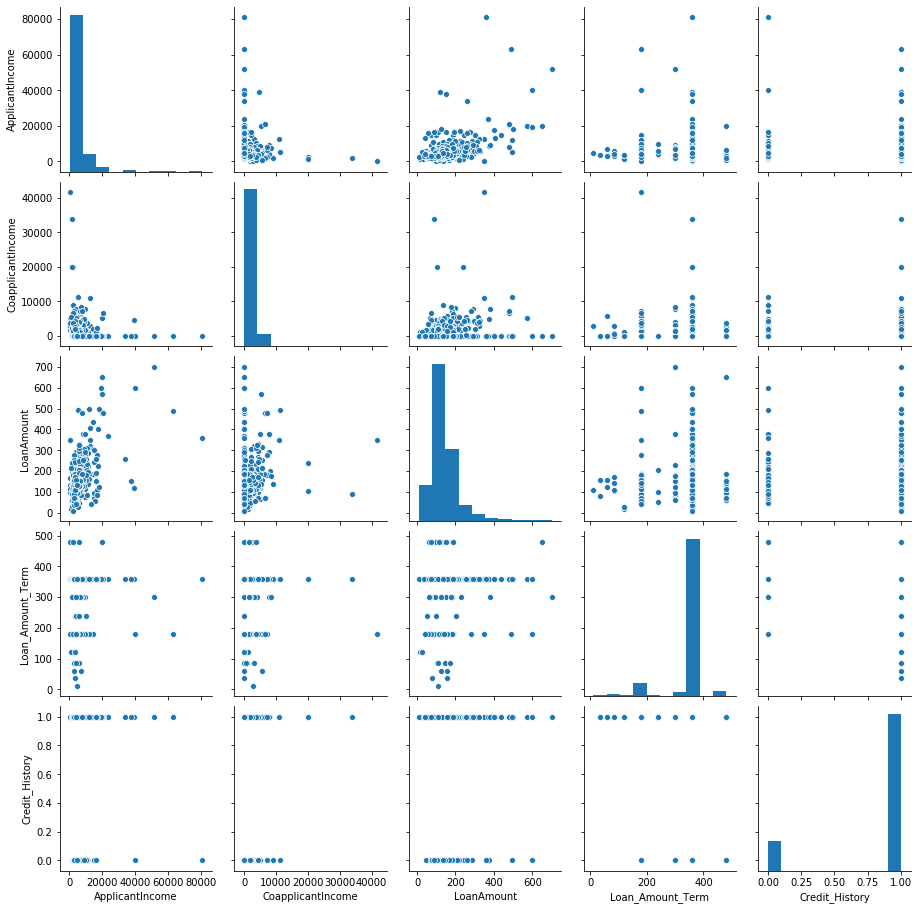

In [69]:
sns.pairplot(df)

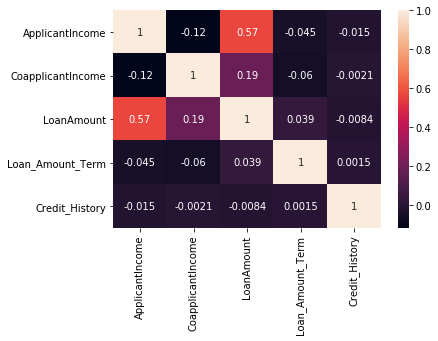

In [311]:
sns.heatmap(df.corr(), annot=True)

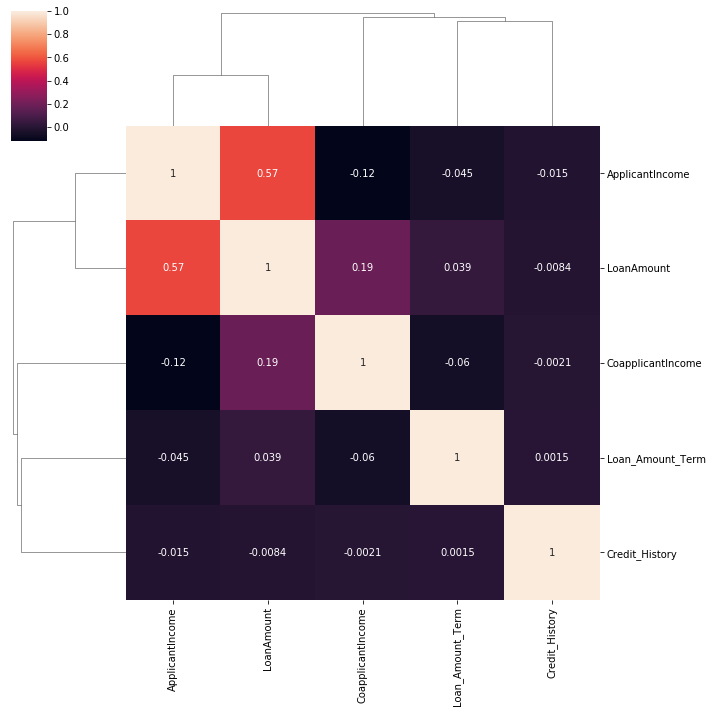

In [315]:
sns.clustermap(df.corr(), annot=True)

On constate que ApplicantIncome et LoanAmount sont fortement corrélées.

## Nettoyage :

### Drop

In [9]:
# On supprime les valeurs Nan :
df = df.dropna()

In [414]:
df.head()

Gender Married Dependents     Education  Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            0.0             4583   
2   Male     Yes          0      Graduate            1.0             3000   
3   Male     Yes          0  Not Graduate            0.0             2583   
4   Male      No          0      Graduate            0.0             6000   
5   Male     Yes          2      Graduate            1.0             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y  
5         Urban           Y

In [424]:
# On regarde le nombre de valeurs contenues dans notre nouveau Dataset ( Lignes, Colonnes) :
df.shape

(480, 12)

In [10]:
# On nettoie la colonne Dependents, en changeant le 3+ en 3, afin de mettre un label sur chaque chiffre et avoir une meilleur compréhension de notre variable, afin de l'utiliser dans l'analyse de nos données :
df['Dependents'] = df['Dependents'].replace(['3+'], '3')

In [11]:
# On remplace dans la target, mes Y par des 1 et N par des 0 :
df["Loan_Status"] = df["Loan_Status"] .replace(['Y', 'N'], [1, 0])

In [12]:
# On remplace dans Gender, les Homme par des 1 et les femmes par des 0 :
df["Gender"] = df["Gender"] .replace(['Male', 'Female'], [0, 1])

In [13]:
# On remplace dans Married, les Homme par des 1 et les femmes par des 0 :
df["Married"] = df["Married"] .replace(['Yes', 'No'], [1, 0])

In [14]:
# On remplace dans Education, les Graduate par des 1 et les femmes par des 0 :
df["Education"] = df["Education"] .replace(['Graduate', 'Not Graduate'], [1, 0])

In [15]:
# On remplace dans Self_Employed, les Y par des 1 et les N par des 0 :
df["Self_Employed"] = df["Self_Employed"] .replace(['No', 'Yes'], [0, 1])

In [ ]:
# On remplace dans Loan_Status, les Y par des 1 et les N par des 0 :
df['Loan_Status'] = df['Loan_Status'].replace(['Y', 'N'], [1, 0])

In [22]:
# On remplace dans Property_Area, les Rural = 1, Urban = 2, Semiurban = 3 par des 1 et les N par des 0 :
df['Property_Area'] = df['Property_Area'].replace(['Rural', 'Urban', 'Semiurban'], [1, 2, 3])

In [23]:
df

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          3          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
5               4196.0       267.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  Loan_Status  
1                1            0  
2                2            1  
3                2            1  
4                2            1  
5                2            1  
..             ...          ...  
609              1            1  
610              1            1  
611              2            1  
612              2            1  
613              3            0  

[480 rows x 12 columns]

In [380]:
plt.figure()
sns.lmplot(x = 'LoanAmount', y='ApplicantIncome', hue ='Loan_Status', data=dfdrop)

<Figure size 432x288 with 0 Axes>

In [97]:
# On regarde les coefficients de correlation qui sont le plus proche de 1 et de -1. Les correlations les plus élevées atteignent 0.57 % :
df.corr()['LoanAmount'].sort_values()

Credit_History      -0.008433
Loan_Amount_Term     0.039447
CoapplicantIncome    0.188619
ApplicantIncome      0.570909
LoanAmount           1.000000
Name: LoanAmount, dtype: float64

In [98]:
# On regarde les coefficients de correlation qui sont le plus proche de 1 et de -1. Les correlations les plus élevées atteignent 0.57 % :
df.corr()['ApplicantIncome'].sort_values()

CoapplicantIncome   -0.116605
Loan_Amount_Term    -0.045306
Credit_History      -0.014715
LoanAmount           0.570909
ApplicantIncome      1.000000
Name: ApplicantIncome, dtype: float64

### Calcul de la moyenne et de la mediane sur les valeurs drop des ApplicantIncome ( Revenus du demandeur ) :

In [320]:
revenus = df['ApplicantIncome']
moyenne = np.mean(revenus)


In [321]:
# La fonction round est juste pour arrondir a deux nombre apres virgule :
print ("Moyenne des revenus : ", round(moyenne, 2))

Moyenne des revenus avec les valeurs drop :  5403.46


La moyenne est sensible aux valeurs extrêmes (outliers). Par conséquent, il est toujours utile de calculer aussi la médiane qui est moins sensible à ces valeurs.

In [322]:
mediane = np.median(revenus)
print("La mediane des revenus : ", round(mediane, 2))

La mediane des revenus avec les valeurs drop :  3812.5


### Calculer les quantiles :

Les quartiles Q1 et Q3

In [323]:
# On calcule le quantile 0,25 qui est le quartile Q1 :
Q1 = round(np.percentile(revenus, 25))
print("Quartile Q1 vaut : ", Q1)

Quartile Q1 vaut :  2878.0


In [324]:
# On calcule le quantile 0,75 qui est le quartile Q3 :
Q3 = round(np.percentile(revenus, 75))
print("Quartile Q3 vaut : ", round(np.percentile(revenus, 75)))

Quartile Q3 vaut :  5795.0


### Mesures de dispersion des données

La variance :
La variance indique de quelle manière la série de données d’une feature se disperse autour de la moyenne. Une variance élevée indique que les valeurs sont très écartées les unes des autres et vice versa.

In [325]:
variance = np.var(revenus)
print("La variance des revenus est ", round(variance, 2))

La variance des revenus est  37259607.77


### L’écart-type (Standard Deviation)

L’écart type est aussi une mesure de dispersion des données. Il est tout simplement la racine carrée de la variance. On utilise souvent l’écart type que la variance pour mieux appréhender le degré de dispersion des données.

In [326]:
ecarttype = np.std(revenus)
print ("L'écart type des revenus est : ", round(ecarttype, 2))

L'écart type des revenus est :  6104.06


### L’écart interquartile

L’écart intequartile mesure la dispersion de 50% des données du dataset. Les 50% des données correspond à celles comprises entre le premier quartile Q1 et le 3eme quartile Q3.

L’écart interquartile est tout simplement la soustraction du troisième quartile du premier

In [327]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(revenus, 25))
 
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(revenus, 75))
print("Quartile Q3 vaut : ", round(np.percentile(revenus, 75)))
 
# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

Quartile Q3 vaut :  5795.0
L ecart interquartile vaut :  2917.0


In [204]:
df_emprunt[["Gender", "Married", "Dependents", "Self_Employed"]].describe()

Gender Married Dependents Self_Employed
count     414     419        413           399
unique      2       2          4             2
top      Male     Yes          0            No
freq      339     285        238           343

In [203]:
df_emprunt[["LoanAmount", "Loan_Amount_Term", "Credit_History"]].describe()

LoanAmount  Loan_Amount_Term  Credit_History
count  411.000000        414.000000      385.000000
mean   144.294404        341.072464        0.981818
std     85.484607         63.247770        0.133782
min     17.000000         12.000000        0.000000
25%    100.000000        360.000000        1.000000
50%    126.000000        360.000000        1.000000
75%    161.000000        360.000000        1.000000
max    700.000000        480.000000        1.000000

In [24]:
#librairie.to_csv("./datasets/df_lib.csv", index=False)
df.to_csv("./csv/dfclean.csv", index=False)

### Pre-Processing suite sur le fichier Finance_Preprocessing_Emma.ipyn